<div style="text-align: center;"></div>

# Chapter 6 Exercises


## Exercise 1
![Exercise 1-1](Images/Exercise1-1.png)
![Exercise 1-2](Images/Exercise1-2.png)


### Sub Exercise a

The marginal distribution is found using:
$$p(x)=\sum_{i=1}^{3}{p(x=x, y=y_{i})}$$
$$p(y)=\sum_{i=1}^{5}{p(x=x_{i}, y=y)}$$
So for x we have:
$$p(x_{1})=\sum_{i=1}^{3}{p(x=x{1}, y=y_{i})}=0.01+0.05+0.1 =0.16$$
$$p(x_{2})=\sum_{i=1}^{3}{p(x=x{2}, y=y_{i})}=0.02+0.1+0.05 =0.17$$
$$p(x_{3})=\sum_{i=1}^{3}{p(x=x{3}, y=y_{i})}=0.03+0.05+0.03=0.11$$
$$p(x_{4})=\sum_{i=1}^{3}{p(x=x{4}, y=y_{i})}=0.1+0.07+0.05 =0.22$$
$$p(x_{5})=\sum_{i=1}^{3}{p(x=x{5}, y=y_{i})}=0.1+0.2+0.04  =0.34$$
And for y we have:
$$p(y_{1})=\sum_{i=1}^{5}{p(x=x_{i}, y=y_{1})}=0.01+0.02+0.03+0.1+0.1=0.26$$
$$p(y_{2})=\sum_{i=1}^{5}{p(x=x_{i}, y=y_{2})}=0.05+0.1+0.05+0.07+0.2=0.47$$
$$p(y_{3})=\sum_{i=1}^{5}{p(x=x_{i}, y=y_{3})}=0.1+0.05+0.03+0.05+0.04=0.27$$


### Sub Exercise b

For conditional probability we have:
$$p(X=x|Y=y_{i})=\frac{P(X=x, Y=y_{i})}{\sum_{j=1}^{3}{P(X=x, Y=y_{j})}})$$
$$p(Y=y|X=x_{i})=\frac{P(X=x_{i}, Y=y)}{\sum_{j=1}^{5}{P(X=x_{j}, Y=y)}})$$
This gives for $p(x|Y=y_{1})$:

| 0.039 | 0.077 | 0.115 | 0.385 | 0.385 |
| ----- | ----- | ----- | ----- | ----- |
| $x_1$ | $x_2$ | $x_3$ | $x_4$ | $x_5$ |

And for $p(y|X=x_{3})$:

| 0.273 | 0.455 | 0.273 |
| ----- | ----- | ----- |
| $y_1$ | $y_2$ | $y_3$ |

## Exercise 2
![Exercise 2](Images/Exercise2.png)

### Sub Exercise a
The marginal distribution of a continuous random variable is computed as:
$$p(x_1)=\int_{R_{x_2}}{p(x_1,x_2)dx_2}=\int_{R_{x_2}}{0.4\mathcal{N}\left(\begin{bmatrix}10\\2 \end{bmatrix}, \begin{bmatrix}1&0\\0&1\end{bmatrix}\right)+
                                                       0.6\mathcal{N}\left(\begin{bmatrix}0\\0 \end{bmatrix}, \begin{bmatrix}8.4&2.0\\2.0&1.7\end{bmatrix}\right)dx_2}$$

$$p(x_1)=\int_{R_{x_2}}{0.4\mathcal{N}\left(\begin{bmatrix}10\\2 \end{bmatrix}, \begin{bmatrix}1&0\\0&1\end{bmatrix}\right)dx_2} +
         \int_{R_{x_2}}{0.6\mathcal{N}\left(\begin{bmatrix}0\\0 \end{bmatrix}, \begin{bmatrix}8.4&2.0\\2.0&1.7\end{bmatrix}\right)dx_2}$$

$$p(x_1)=0.4\mathcal{N}(10,1)+0.6\mathcal{N}(0,\sqrt{8.4})$$
$$p(x_2)=0.4\mathcal{N}(2,1)+0.6\mathcal{N}(0,\sqrt{1.7})$$

### Sub Exercise b
The mean is computed as:
$$E[x_1]=\int_{-\infty}^{\infty}{x_1p(x_1)dx_1}=\int_{-\infty}^{\infty}{x_1\left(0.4\mathcal{N}(10,1)+0.6\mathcal{N}(0,\sqrt{8.4})\right)dx_1}$$
$$E[x_1]=0.4\int_{-\infty}^{\infty}{x_1\mathcal{N}(10,1)dx_1}+0.6\int_{-\infty}^{\infty}{x_1\mathcal{N}(0,\sqrt{8.4})dx_1}=0.4\cdot 10+0.6 \cdot 0=4$$
Similarly:
$$E[x_2]=0.4 \cdot 2 +0.6 \cdot 0=0.8$$
The mode is the maximum value in the function. This can be found by differentiating and setting that differential equal to 0 to find the local maximum:
$$\frac{d(p(x_1))}{d(x_1)}=-0.4\frac{x-10}{\sqrt{2\pi}}\cdot e^{-\frac{(x-10)^2}{2}}-0.6\frac{x}{\sqrt{2\pi\cdot 8.4^3}}\cdot e^{-\frac{x^2}{2\cdot 8.4}}=0$$
$$\frac{d(p(x_1))}{d(x_1)}=0.4(x-10)\cdot e^{-\frac{(x-10)^2}{2}}+0.6\frac{x}{\sqrt{8.4^3}}\cdot e^{-\frac{x^2}{2\cdot 8.4}}=0$$
$$\frac{d(p(x_1))}{d(x_1)}=\left(0.4e^{-\frac{(x-10)^2}{2}}+\frac{0.6}{\sqrt{8.4^3}}e^{-\frac{x^2}{2\cdot 8.4}}\right)x-4e^{-\frac{(x-10)^2}{2}}=0$$
This looks hopeless. Might as well program my own gradient ascent:

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [26]:

def ascent1(stepSize, epsilon, startVal = 10):
    function = lambda x : 0.4*(1/np.sqrt(2*np.pi))*np.exp(-((x-10)**2)/(2))+0.6*(1/np.sqrt(2*np.pi*8.4))*np.exp(-(x**2)/(2*8.4))
    derivative = lambda x : -0.4*((x-10)/np.sqrt(2*np.pi))*np.exp(-((x-10)**2)/(2))-0.6*(x/np.sqrt(2*np.pi*8.4**3))*np.exp(-(x**2)/(2*8.4))
    lastVal = 0
    xVal = startVal
    currentVal = function(xVal)
    while np.abs(currentVal-lastVal)>epsilon:
        lastVal = currentVal
        xVal += stepSize*derivative(xVal)
        currentVal = function(xVal)
    return (xVal, currentVal)

def ascent2(stepSize, epsilon, startVal = 10):
    function = lambda x : 0.4*(1/np.sqrt(2*np.pi))*np.exp(-((x-2)**2)/(2))+0.6*(1/np.sqrt(2*np.pi*1.7))*np.exp(-(x**2)/(2*1.7))
    derivative = lambda x : -0.4*((x-2)/np.sqrt(2*np.pi))*np.exp(-((x-2)**2)/(2))-0.6*(x/np.sqrt(2*np.pi*1.7**3))*np.exp(-(x**2)/(2*1.7))
    lastVal = 0
    xVal = startVal
    currentVal = function(xVal)
    while np.abs(currentVal-lastVal)>epsilon:
        lastVal = currentVal
        xVal += stepSize*derivative(xVal)
        currentVal = function(xVal)
    return (xVal, currentVal)

res1 = ascent1(0.1, 0.0000001, 7)
print(res1)
res2 = ascent2(0.1, 0.0000001, 0)
print(res2)



(9.99226666497335, 0.15978882719425405)
(1.315977056746852, 0.23660357908452534)


This shows that the mode of $p(x_1)$ is 10 and the mode of $p(x_2)$ is 1.316.

Lastly the median is the value that satisfies:
$$P(X<x)=\int_{-\infty}^{x}{p(x)dx}=0.5$$
For this Imma just use a pre made normal distribution and then use the inverse CDF to find the value:

C:\Users\moham\AppData\Local\Temp\ipykernel_12184\480793480.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  Fig1.show()
C:\Users\moham\AppData\Local\Temp\ipykernel_12184\480793480.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  Fig2.show()


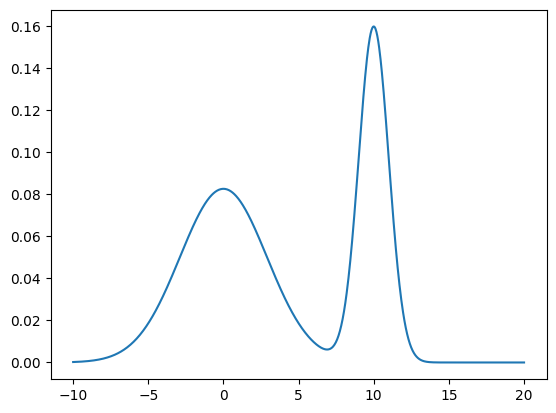

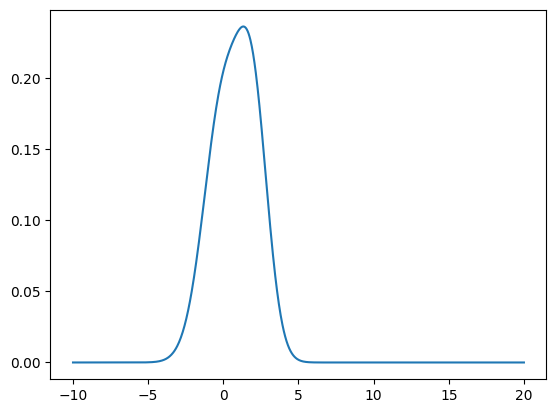

In [28]:
RNG = np.random.default_rng(123)
#normal1 = RNG.normal(10, 1, 1000)
#normal2 = RNG.normal(0, np.sqrt(8.4), 1000)
x = np.linspace(-10,20, 1000)
#x1 = 0.4*normal1+0.6*normal2
y1 = 0.4*stats.norm(10, 1).pdf(x) + 0.6*stats.norm(0, np.sqrt(8.4),).pdf(x)
Fig1, ax1 = plt.subplots()
ax1.plot(x, y1)
Fig1.show()
#normal3 = RNG.normal(2, 1, 1000)
#normal4 = RNG.normal(0, np.sqrt(1.7), 1000)
#x2 = 0.4*normal3+0.6*normal4
#x2 = np.linspace(-10,20, 1000)
y2 = 0.4*stats.norm(2, 1).pdf(x) + 0.6*stats.norm(0, np.sqrt(1.7),).pdf(x)
Fig2, ax2 = plt.subplots()
ax2.plot(x, y2)
Fig2.show()

## Exercise 3
![Exercise 3](Images/Exercise3.png)

## Exercise 4
![Exercise 4](Images/Exercise4.png)

## Exercise 5
![Exercise 5-1](Images/Exercise5-1.png)
![Exercise 5-2](Images/Exercise5-2.png)

## Exercise 6
![Exercise 6](Images/Exercise6.png)

## Exercise 7
![Exercise 7](Images/Exercise7.png)

## Exercise 8
![Exercise 8](Images/Exercise8.png)

## Exercise 9
![Exercise 9](Images/Exercise9.png)

## Exercise 10
![Exercise 10](Images/Exercise10.png)

## Exercise 11
![Exercise 11](Images/Exercise11.png)

## Exercise 12
![Exercise 12-1](Images/Exercise12-1.png)
![Exercise 12-2](Images/Exercise12-2.png)

## Exercise 13
![Exercise 13](Images/Exercise13.png)